In [18]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
#Dokonaj statystycznej analizy (obliczenie średniej, kwartyli czy wykresów pudełkowych) dla zmiennej Fare (opłata).
fare=dataset['Fare']
#fare_values = dataset.loc[dataset['Fare'].isnull(), 'Fare'].values - nie ma żadnych isnull, tak więc pytanie czy umieszczać to w kodzie?
 
mean_fare = np.round(np.mean(fare))
print(f'Średnia: {mean_fare}')


Średnia: 32.0


In [20]:
median_fare = np.round(np.median(fare))
print(f'Mediana: {median_fare}')

Mediana: 14.0


In [21]:
mode_fare = stats.mode(fare)
print(f'Moda: {mode_fare}')

Moda: ModeResult(mode=array([8.05]), count=array([43]))


C:\Users\pawit\AppData\Local\Temp\ipykernel_11280\1262322042.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare)


In [22]:

stats = dataset[['Fare']].describe(percentiles=[.25, .5, .75, 1])
stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']
stats.loc['IQR']

Fare    23.0896
Name: IQR, dtype: float64

In [23]:
q0 = np.quantile(fare, 0.0)
q1 = np.quantile(fare, 0.25)
q2 = median_fare
q3 = np.quantile(fare, 0.75)
q4 = np.quantile(fare, 1.0)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')


Q0: 0.0
Q1: 8.0
Q2: 14.0
Q3: 31.0
Q4: 512.0


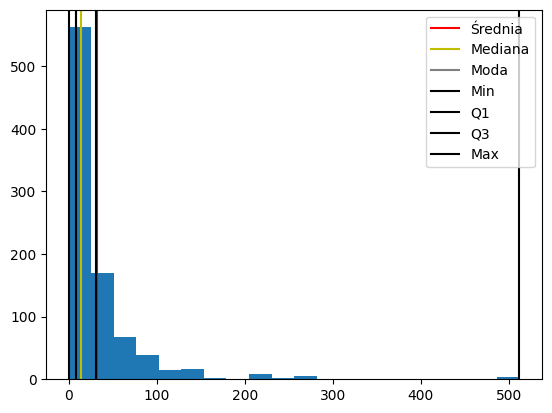

In [24]:
plt.hist(fare, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='y', label = 'Mediana')
plt.axvline(x = mode_fare[0], color = 'grey', label = "Moda")
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [25]:
fare_range = max(fare) - min(fare)
sd_fare = np.std(fare, ddof=1)
print(f'Zakres opłat to : {fare_range:.2f} a standardowe odchylenie to {sd_fare:.2f}')


Zakres opłat to : 512.33 a standardowe odchylenie to 49.69


{'whiskers': [<matplotlib.lines.Line2D at 0x1536f1cd840>,
 'caps': [<matplotlib.lines.Line2D at 0x1536f1cdde0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1536f1cd690>],
 'medians': [<matplotlib.lines.Line2D at 0x1536f1ce380>],
 'fliers': [<matplotlib.lines.Line2D at 0x1536f1ce650>],
 'means': []}

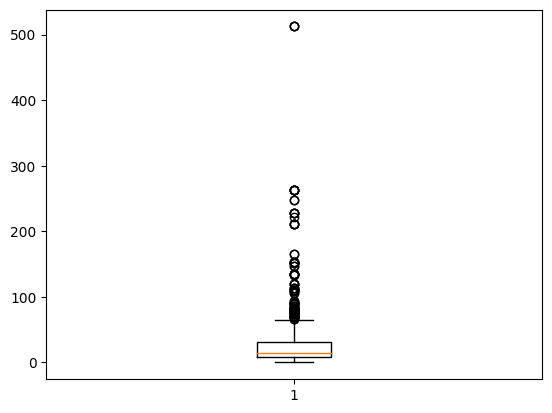

In [26]:
plt.boxplot(fare)
